In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

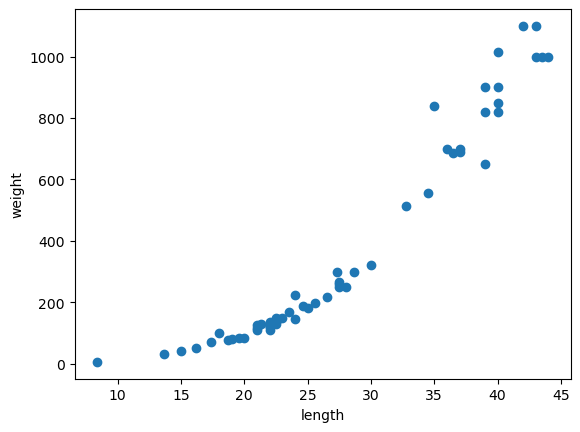

In [2]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
# 훈련 세트, 테스트 세트 분리 
# 지도학습 - 훈련 데이터: 농어의 길이(perch_length), 정답 데이터(타겟 데이터): 농어의 무게(perch_weight)

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight
)

In [6]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [7]:
print(train_input[:5])

[25.6 24.  40.  27.5 36. ]


In [10]:
# 훈련 가능한 2차원 넘파이 배열로 변경 
# train_input = train_input.reshape(42, 1)
train_input = train_input.reshape(-1, 1)

test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [11]:
# KNeighborsRegressor : K-최근접 이웃 회귀
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target) # 훈련

KNeighborsRegressor()

In [12]:
# 결정계수(R^2)
knr.score(test_input, test_target)

0.988355616158771

In [18]:
from sklearn.metrics import mean_absolute_error

predictions = knr.predict(test_input) # 테스트 세트 - 길이 -> 무게 예측
print("농어의 길이", test_input[:5])
print("농어의 무게 예측치", predictions[:5])
print("농어의 실 무게", test_target[:5])

# 테스트 세트와 예측치에 대한 절대값 오차
mae = mean_absolute_error(test_target, predictions)
print("평균 절대값 오차", mae)


농어의 길이 [[24. ]
 [17.4]
 [37. ]
 [30. ]
 [22. ]]
농어의 무게 예측치 [151.  78. 715. 265. 123.]
농어의 실 무게 [225.  70. 690. 320. 130.]
평균 절대값 오차 23.949999999999996


In [ ]:
# 과대 적합 : 훈련 세트 검증 점수가 테스트 세트 보다 더 높은 경우, 훈련 세트에 더 잘 맞는 결과, 훈련을 과도하게 한 경우
#           해결방법 : 과대 적합이 시작되는 지점에서 훈련을 멈추는 것 
#
# 과소 적합 : 훈련 세트 검증 점수, 테스트 세트의 검증 점수가 전반적으로 낮은 경우, 훈련 세트의 검증 점수 < 테스트 세트 검증 점수 - 학습을 덜 한 경우, 모델이 덜 복잡한 경우
#           해결방법 : 1) 학습을 충분히 시킨다. 2) 모델의 복잡성을 추가 

print(knr.score(train_input, train_target)) # 훈련 세트 결정 계수
print(knr.score(test_input, test_target)) # 테스트 세트 결정 계수

0.9716815038575781
0.988355616158771


In [25]:
# 과소 적합 해결 방법 - 모델의 복잡성 추가(이웃의 갯수를 줄인다)
knr.n_neighbors = 3 # 기본값은 5, 표본의 주변 이웃 5개가 기본값, 3개로 줄였다.

knr.fit(train_input, train_target) # 훈련을 다시 한다.

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9770940103038314
0.9895682894403925


In [27]:
knr.predict([[41], [46]])

array([ 978.33333333, 1033.33333333])

In [28]:
knr.predict([[50], [100]])

array([1033.33333333, 1033.33333333])

In [29]:
distances, indexes = knr.kneighbors([[50]]) # 50cm 주변 이웃 인덱스
print(indexes)

[[26 29 30]]


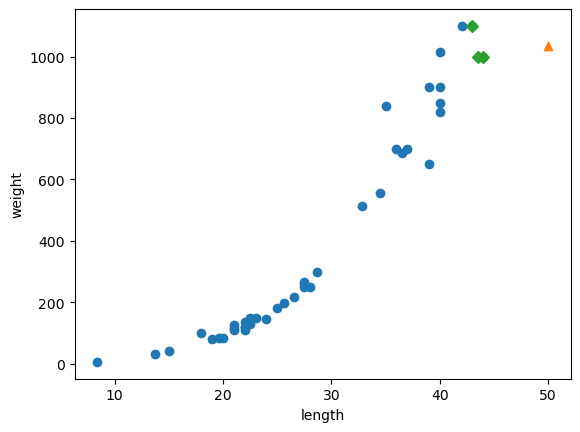

In [33]:
plt.scatter(train_input, train_target) # 훈련 세트
plt.scatter(50, 1033, marker='^') # 50cm, 1033g
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 50cm 농어 주변 이웃
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
print(np.mean(train_target[indexes]))
# k-최근접 이웃 회귀에서 예측은 주변 이웃의 무게 평균을 가지고 예측, 학습한 데이터의 범위를 벗어나면 예측이 정확하지 않다!

1033.3333333333333